# Digital Innovation One - Análise de dados com Python e Pandas (2)

<pre>
Autor: Leonardo Simões
Data: 23/06/2021
</pre>

---
## Sumário
- [Introdução](#intro)
- [Preparação dos dados](#data_wrangling) 
- [Aquisição dos dados](#gather)
- [Avaliação dos dados](#evaluation)
- [Análise Exploratória](#eda)

---
<a id='intro'></a>
## Introdução

Projeto prático "Análise de dados com Python e Pandas" do Bootcamp "Banco Carrefour Data Engineer" da Digital Innovation One.

----
<a id='data_wrangling'></a>
## Preparação dos dados

Esta etapa antecede a análise. Aqui, os dados são carregados, avaliados, organizados e limpos, para garantir que as etapas seguintes sejam feitas de modo correto, conscistente e suscinto. A etapa de preparação de dados é divida em outras que consistem nas tarefas citadas anteriormente.

In [1]:
# imports das bibliotecas usadas até a parte da análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

---
<a id='gather'></a>
## Aquisição dos dados

Nesta etapa os dados são carregados em objeto(s) pandas do tipo dataframe. 

In [3]:
df = pd.read_excel("./datasets/AdventureWorks.xlsx")
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


---
<a id='evaluation'></a>
## Avaliação dos dados

Nesta etapa, os dataframes são examinados para procurar problemas de organização e qualidade dos dados.

### Informações gerais do dataframe:

In [4]:
def exibir_informacoes_gerais(df):
    # Exibindo informações gerais do dataframe
    valores_na = df.isna().sum()
    informacoes = pd.DataFrame({'Coluna': df.columns,
                                'Tipo': df.dtypes,
                                'Quantidade de ausentes': valores_na,
                                'Porcentagem de ausentes': valores_na / df.shape[0]
                                })
    informacoes.reset_index(drop=True, inplace=True)
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].round(4) * 100
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].astype(str) + ' %'
    #print("Informações gerais das colunas")
    #print(informacoes)
    return informacoes

In [5]:
exibir_informacoes_gerais(df)

,Coluna,Tipo,Quantidade de ausentes,Porcentagem de ausentes
0,Data Venda,datetime64[ns],0,0.0 %
1,Data Envio,datetime64[ns],0,0.0 %
2,ID Loja,int64,0,0.0 %
3,ID Produto,int64,0,0.0 %
4,ID Cliente,int64,0,0.0 %
5,No. Venda,object,0,0.0 %
6,Custo Unitário,float64,0,0.0 %
7,Preço Unitário,float64,0,0.0 %
8,Quantidade,int64,0,0.0 %
9,Valor Desconto,float64,0,0.0 %


### Descrição das colunas quantitativas do dataframe:

In [6]:
def descrever_colunas_quantitativas(df):
    # Descrevendo colunas numéricas (quantitativas)
    descricao_df = df.describe()
    descricao_df.index = ['quantidade', 'média', 'desvio padrao', 'mínimo', 'quartil 1 (25%)',
                          'mediana - quartil 2 (50%)', 'quartil 3 (75%)', 'máximo']
    # print("Descrição de colunas numéricas")
    # print(descricao_df)
    return descricao_df

In [7]:
descrever_colunas_quantitativas(df)

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
quantidade,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
média,270.02,"1,225.24","19,029.09",272.01,742.53,62.95,689.12,"6,620.14"
desvio padrao,50.96,706.70,96.43,129.77,368.59,148.95,822.36,"4,319.41"
mínimo,199.00,366.00,"18,815.00",5.09,9.99,2.00,0.00,159.84
quartil 1 (25%),199.00,384.00,"18,964.75",324.69,758.00,6.00,0.00,"3,920.00"
mediana - quartil 2 (50%),306.00,"1,202.00","19,060.00",330.66,980.00,9.00,461.17,"5,798.70"
quartil 3 (75%),307.00,"1,226.00","19,107.00",348.58,998.00,17.00,"1,005.08","7,986.00"
máximo,307.00,"2,497.00","19,145.00",348.58,999.00,"1,560.00","6,272.00","29,400.00"


### Descrição das colunas qualitativas do dataframe:

In [8]:
def descrever_colunas_qualitativas(df):
    # Descrevendo colunas qualitativas
    colunas_qualitativas = df.select_dtypes(exclude=['number']).columns.values
    df_qualitativo = df[colunas_qualitativas]
    if len(df_qualitativo.columns) > 0:
        descricao_qualitativa = pd.DataFrame({'Coluna': df_qualitativo.columns,
                                              'Tipo': df_qualitativo.dtypes,
                                              'Valores únicos': df_qualitativo.nunique(),
                                              'Valor mais comum': df_qualitativo.describe().T['top'],
                                              'Maior frequência': df_qualitativo.describe().T['freq'],
                                              
                                              })
        descricao_qualitativa.reset_index(drop=True, inplace=True)
        #print("Descrição das colunas não numéricas")
        #print(descricao_qualitativa)
        return descricao_qualitativa
    else:
        print("O dataset não possui colunas qualitativas, todas são numéricas.")

In [9]:
descrever_colunas_qualitativas(df)

,Coluna,Tipo,Valores únicos,Valor mais comum,Maior frequência
0,Data Venda,datetime64[ns],483,2008-06-07 00:00:00,6
1,Data Envio,datetime64[ns],478,2008-07-03 00:00:00,7
2,No. Venda,object,821,200802124CS549,3
3,Produto,object,9,Adventure Works Laptop15.4W M1548 Black,123
4,Fabricante,object,3,"Fabrikam, Inc.",494
5,Marca,object,3,Fabrikam,494
6,Classe,object,2,Regular,732
7,Cor,object,5,Black,315


### Avaliação das dimensões dos dataframes:

In [10]:
def printDimensoesDf(df, nome=''):
    print('As dimensões do dataset ' + nome +  ' são ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas.')

In [11]:
#exibir_dimensoes
printDimensoesDf(df, 'atual')

As dimensões do dataset atual são 904 linhas e 16 colunas.


### Avaliação de colunas:

In [12]:
# Colunas originais do dataframe
colunas_df = df.columns.values
colunas_df

array(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'], dtype=object)

### Verificação de linhas duplicadas:

In [13]:
def printNumDuplicadas(df):
    num_duplicadas = df.duplicated().sum()
    print('A quantidade de linhas duplicadas é ' + str(num_duplicadas) + '.')

In [14]:
printNumDuplicadas(df)

A quantidade de linhas duplicadas é 0.


### Verificação de valores ausentes:

In [15]:
df.isna().sum().sum()

0

In [16]:
def printValoresAusentes(df):
    valores_na = df.isna().sum()
    valores_na = valores_na[valores_na > 0].sort_values(ascending=False)

    if not valores_na.empty:
        colunas_na = ', '.join(valores_na.index.values)
        print('As colunas com valores ausentes são: ' + colunas_na + '.')
        print(valores_na)
    else:
        print('Não há colunas com valores ausentes')

In [17]:
printValoresAusentes(df)

Não há colunas com valores ausentes


### Verificação dos tipos de dados das colunas:

In [18]:
df.dtypes.value_counts()

object            6
int64             4
float64           4
datetime64[ns]    2
dtype: int64

---
<a id='eda'></a>
## Análise Exploratória

Colunas que podem ser analisadas:

In [19]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

Perguntas:

1) Quantas e quais Lojas, produtos, fabricantes, marcas, classes, cores existem no dataset?

2) Qual a marca mais vendida?

3) Qual fabricante teve maior número de venda?

4) Qual é o produto menos vendido?

5) Qual a distribuição dos valores de venda?

6) Qual a proporção entre as cores?

7) Qual a proporção entre as duas classes?

8) Qual o maior valor de desconto aplicado a uma venda?

9) Qual produto com maior preço unitário?

10) Qual maior intervalo entre a data de venda e a data de envio?

    1) Quantas e quais Lojas, produtos, fabricantes, marcas, classes, cores existem no dataset?

Loja:

In [20]:
df['ID Loja'].nunique()

3

In [21]:
df['ID Loja'].unique()

array([199, 306, 307], dtype=int64)

Produto:

In [22]:
df['Produto'].nunique(), df['ID Produto'].nunique()

(9, 9)

In [23]:
df['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [24]:
df['ID Produto'].unique()

array([ 384, 1178, 1202, 1203, 1155, 1226,  366, 2496, 2497], dtype=int64)

Fabricante:

In [25]:
df['Fabricante'].nunique()

3

In [26]:
df['Fabricante'].unique()

array(['Adventure Works', 'Fabrikam, Inc.', 'Contoso, Ltd'], dtype=object)

Marca:

In [27]:
df['Marca'].nunique()

3

In [28]:
df['Marca'].unique()

array(['Adventure Works', 'Fabrikam', 'Contoso'], dtype=object)

Classe:

In [29]:
df['Classe'].nunique()

2

In [30]:
df['Classe'].unique()

array(['Regular', 'Economy'], dtype=object)

Cor:

In [31]:
df['Cor'].nunique()

5

In [32]:
df['Cor'].unique()

array(['Red', 'White', 'Grey', 'Black', 'Silver'], dtype=object)

    2) Qual a marca mais vendida?

In [35]:
df['Cor'].describe()[['top', 'freq']]

top     Black
freq      315
Name: Cor, dtype: object

In [36]:
df['Cor'].value_counts()

Black     315
Grey      212
White     175
Red       115
Silver     87
Name: Cor, dtype: int64

    3) Qual fabricante teve maior número de venda?

In [37]:
df['Fabricante'].describe()[['top', 'freq']]

top     Fabrikam, Inc.
freq               494
Name: Fabricante, dtype: object

In [46]:
df['Fabricante'].value_counts()[:1]

Fabrikam, Inc.    494
Name: Fabricante, dtype: int64

    4) Qual é o produto menos vendido?

In [45]:
df['Produto'].value_counts(ascending=True)[:1]

Headphone Adapter for Contoso Phone E130 White    85
Name: Produto, dtype: int64

    5) Qual a distribuição dos valores de venda?

In [47]:
df['Valor Venda'].describe()

count                 904.00
mean                6,620.14
std                 4,319.41
min                   159.84
25%                 3,920.00
50%                 5,798.70
75%                 7,986.00
max                29,400.00
Name: Valor Venda, dtype: float64

In [54]:
def plotar_histogramas(df, colunas_histogramas):
    print('Histograma')

    if colunas_histogramas:
        for coluna in colunas_histogramas:
            fig = plt.figure(figsize=(13, 9))
            ax = sns.distplot(df[coluna], kde=True)
            ax.set_title('Distribuição de ' + coluna)
            ax.set_ylabel('Quantidade')
            ax.set_xlabel(coluna.capitalize())
            plt.show()

Histograma


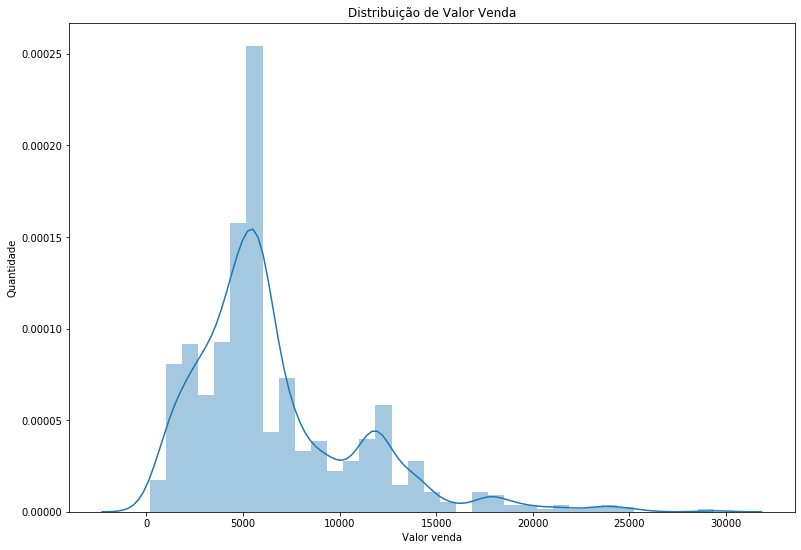

In [55]:
plotar_histogramas(df, ['Valor Venda'])

In [59]:
def plotar_boxplot(df, colunas_boxplot):
    print('Diagramas de Caixa (Boxplots)')

    if colunas_boxplot:
        for coluna in colunas_boxplot:
            fig = plt.figure(figsize=(13, 9))
            ax = sns.boxplot(x=df[coluna])
            ax.set_title('Distribuição de ' + coluna)
            ax.set_xlabel(coluna.capitalize())
            plt.show()

Diagramas de Caixa (Boxplots)


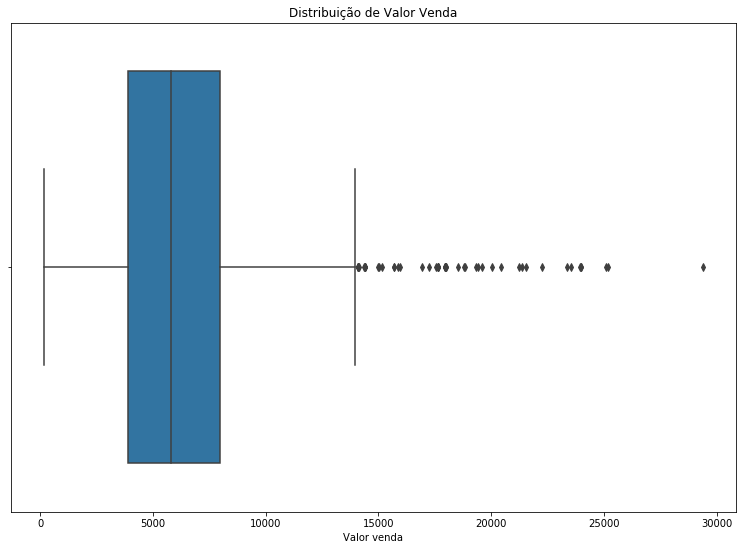

In [60]:
plotar_boxplot(df, ['Valor Venda'])

    6) Qual a proporção entre as cores?

In [61]:
def contar_valores(df, colunas_contagem, porcentagem=False, transposto=False):
    print('Contagem de valores por coluna')
    if colunas_contagem:
        for coluna in colunas_contagem:
            contagem = df[coluna].value_counts(normalize=porcentagem)
            if transposto:
                contagem = contagem.to_frame().T
                contagem.index = ['Quantidade']
            print('Valores de ' + coluna)
            print(contagem)

In [65]:
contar_valores(df, ['Cor'], porcentagem=False, transposto=False)

Contagem de valores por coluna
Valores de Cor
Black     315
Grey      212
White     175
Red       115
Silver     87
Name: Cor, dtype: int64


In [66]:
contar_valores(df, ['Cor'], porcentagem=True, transposto=False)

Contagem de valores por coluna
Valores de Cor
Black                    0.35
Grey                     0.23
White                    0.19
Red                      0.13
Silver                   0.10
Name: Cor, dtype: float64


In [67]:
def plotar_barras(df, colunas_barras):
    print('Gráficos de Barras')
  
    if colunas_barras:
        for coluna in colunas_barras:
            color = sns.color_palette("Blues_d")
            fig = plt.figure(figsize=(13, 9))
            ax = sns.countplot(x=df[coluna], palette=color, order=df[coluna].value_counts().index)
            ax.set_title('Distribuição de ' + coluna)
            ax.set_ylabel('Quantidade')
            ax.set_xlabel(coluna.capitalize())

Gráficos de Barras


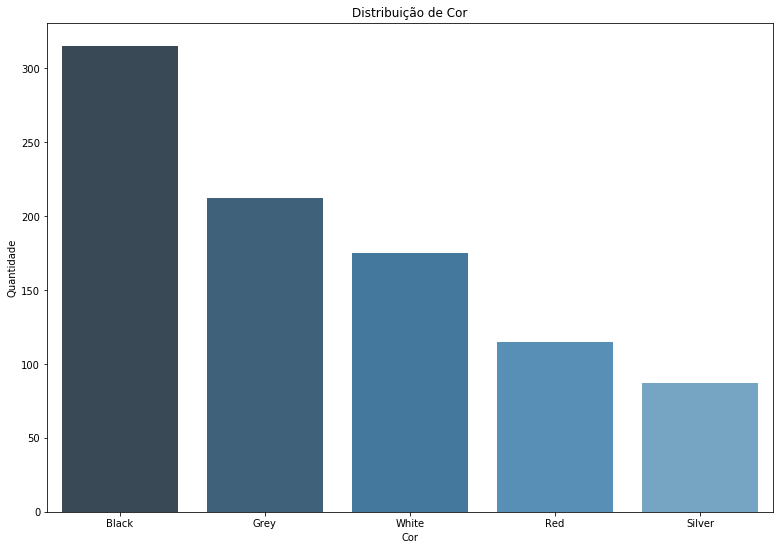

In [68]:
plotar_barras(df, ['Cor'])

    7) Qual a proporção entre as duas classes?

In [69]:
contar_valores(df, ['Classe'], porcentagem=False, transposto=True)

Contagem de valores por coluna
Valores de Classe
            Regular  Economy
Quantidade      732      172


In [70]:
contar_valores(df, ['Classe'], porcentagem=True, transposto=True)

Contagem de valores por coluna
Valores de Classe
                        Regular              Economy
Quantidade                 0.81                 0.19


Gráficos de Barras


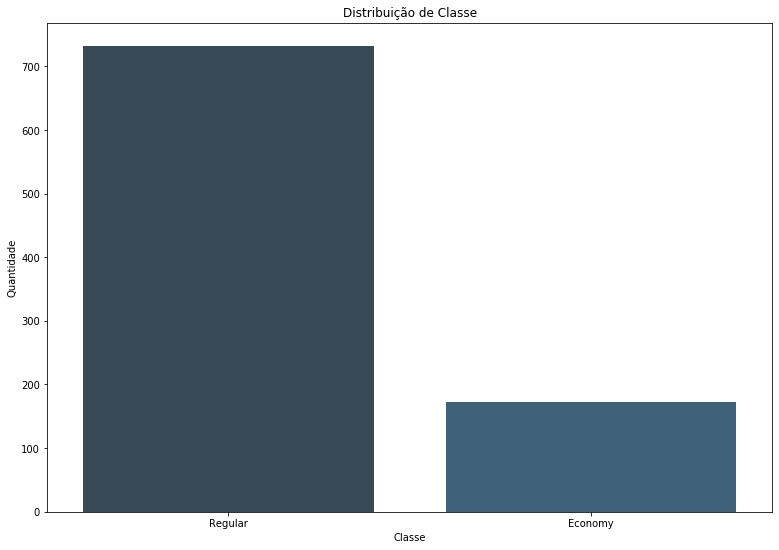

In [71]:
plotar_barras(df, ['Classe'])

    8) Qual o maior valor de desconto aplicado a uma venda?

In [78]:
maior_desconto = df['Valor Desconto'].max()
maior_desconto

6272.0

In [79]:
# Venda(s) com o maior desconto
df.query('`Valor Desconto` == @maior_desconto')

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
339,2008-12-16,2008-12-27,199,1203,18897,200812164CS805,324.69,980.00,32,"6,272.00","25,088.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey


    9) Qual produto com maior preço unitário?

In [92]:
maior_preco_unitario = df['Preço Unitário'].max()
maior_preco_unitario

999.0

In [93]:
df.query('`Preço Unitário` == @maior_preco_unitario')['Produto'].unique()

array(["Fabrikam Trendsetter 1/3'' 8.5mm X200 Black"], dtype=object)

    10) Qual maior intervalo entre a data de venda e a data de envio?

In [95]:
intervalo = df['Data Envio'] - df['Data Venda']
intervalo.dt.days.max()

20